<a href="https://colab.research.google.com/github/mauroES/DataScience/blob/master/DesafioProuni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Descrição Desafio 01**

Realizar a extração dos dados (http://dados.gov.br/dataset/mec-prouni) referente ao Programa Universidade Para Todos – Prouni PDA/MEC nos anos 2016 e 2018.

**Tarefas:**

1. Modelar um banco de dados dimensional que atenda às necessidades do cliente, 
utilizando os arquivos CSV’s disponíveis. 
2. capturar os dados disponíveis nos arquivos CSV’s e popular o banco de dados criado na etapa 1 (preferencialmente de forma automatizada - processo de ETL).
3. Definir métricas que possam ser acompanhadas pelo cliente
4. Disponibilizar um Painel / Dashboard desenvolvido em Power BI, de forma que tenha um layout amigável, com fácil compreensão e com possibilidade de realizar filtros que facilite o agrupamento de informações.



## **Inportação e Instalação das Libs**

In [ ]:
#!pip install mysql-connector-python

In [ ]:
import pandas as pd
import mysql.connector as msql
from mysql.connector import Error

import seaborn as sns

## **Extração e Tratamento dos dados**

Foram coletados os dois arquivos no endereço http://dados.gov.br/dataset/mec-prouni, e em seguida foram concatenados.
Foi realizada também uma analise exploratória inicial para tratar possiveis insconsistências nos dados.

**Campos que tiveram que eliminar registros vazios:**

* TIPO_BOLSA
* NOME_CURSO_BOLSA
* NOME_TURNO_CURSO_BOLSA
* DT_NASCIMENTO_BENEFICIARIO

**Preenchimento incorreto:**

* MODALIDADE_ENSINO_BOLSA
* SEXO_BENEFICIARIO_BOLSA
* BENEFICIARIO_DEFICIENTE_FISICO
* REGIAO_BENEFICIARIO_BOLSA


In [ ]:
datasetUrl2016 = "http://informacao.mec.gov.br/bilibs/PDA/PROUNI/PDA_PROUNI_2016_CSV.csv"
datasetUrl2018 = "http://dadosabertos.mec.gov.br/images/conteudo/prouni/2018/pda-prouni-2018.csv"
base2016 = pd.read_csv(datasetUrl2016,sep=";",encoding = "ISO-8859-1", engine='python')
base2018 = pd.read_csv(datasetUrl2018,sep=";",encoding = "ISO-8859-1", engine='python')
dsExtraido = pd.concat([base2016, base2018])
dsExtraido.to_csv('DS_EXTRAIDO.csv',sep=';')

In [ ]:
dsFinal = pd.read_csv('/content/PROUNI_FINAL.csv',sep=",",encoding = "ISO-8859-1", engine='python')
nulos = dsFinal.isnull().sum()
nulos

ANO_CONCESSAO_BOLSA               0
CODIGO_EMEC_IES_BOLSA             0
NOME_IES_BOLSA                    0
TIPO_BOLSA                        0
MODALIDADE_ENSINO_BOLSA           0
NOME_CURSO_BOLSA                  0
NOME_TURNO_CURSO_BOLSA            0
CPF_BENEFICIARIO_BOLSA            0
SEXO_BENEFICIARIO_BOLSA           0
RACA_BENEFICIARIO_BOLSA           0
DT_NASCIMENTO_BENEFICIARIO        0
BENEFICIARIO_DEFICIENTE_FISICO    0
REGIAO_BENEFICIARIO_BOLSA         0
SIGLA_UF_BENEFICIARIO_BOLSA       0
MUNICIPIO_BENEFICIARIO_BOLSA      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



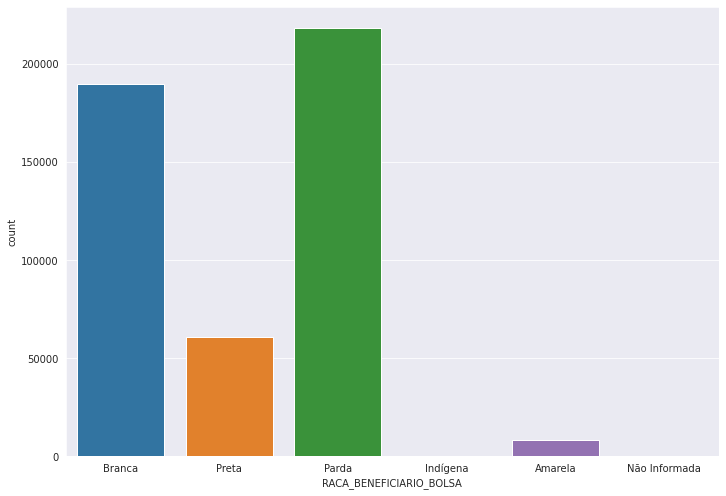

In [ ]:
#Os campos devem sergir esse padrão http://informacao.mec.gov.br/bilibs/PDA/PROUNI/Dicionario_ProUni.pdf
#grafico de barras verificando algumas variavéis
#['MODALIDADE_ENSINO_BOLSA','SEXO_BENEFICIARIO_BOLSA','BENEFICIARIO_DEFICIENTE_FISICO','REGIAO_BENEFICIARIO_BOLSA']

sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot('RACA_BENEFICIARIO_BOLSA', data = dsFinal);

## **Inserção no Banco de dados**
Nesta seção foram realizadas a conexão com o banco de dado e a inserção dos dados.

* Banco de dados: dbDesafio
* Tabela: bolsistas
* Inserção dos dados na tabela bolsista usando o csv PROUNI_FINAL




In [ ]:
path="/content/PROUNI_FINAL.csv"
dados = pd.read_csv(path,sep=",",encoding = "ISO-8859-1", engine='python')
try:
    conn = msql.connect(host='localhost', database='dbDesafio', user='root', password='#######')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("Conectado: ", record)
        cursor.execute('DROP TABLE IF EXISTS bolsistas;')
        cursor.execute("CREATE TABLE bolsistas (COD_BOLSISTA INT AUTO_INCREMENT, ANO_CONCESSAO VARCHAR(4) NOT NULL, CODIGO_EMEC_IES INT NOT NULL, NOME_IES VARCHAR(100) NOT NULL, TIPO VARCHAR(30) NOT NULL, MODALIDADE_ENSINO VARCHAR(40) NOT NULL, CURSO VARCHAR(90) NOT NULL, TURNO VARCHAR(18) NOT NULL, CPF VARCHAR(11), SEXO VARCHAR(10) NOT NULL, RACA VARCHAR(14) NOT NULL, DT_NASCIMENTO VARCHAR(10), DEFICIENTE_FISICO VARCHAR(4) NOT NULL, REGIAO VARCHAR(13) NOT NULL, SIGLA_UF VARCHAR(2) NOT NULL, MUNICIPIO VARCHAR(40) NOT NULL, PRIMARY KEY(COD_BOLSISTA))")
        total = 0
        for i,row in dados.iterrows():
            sql = "INSERT INTO dbDesafio.bolsistas VALUES (null,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
            cursor.execute(sql, tuple(row))
            conn.commit()
            total =total + 1
    print("Total de registro no arquivo CSV: ",len(dados))
    print("Total de registro inseridos no banco dbDesafio:",total)
except Error as e:
    print("Erro ao conectar", e)